INTERNAL PROJECT: EXPLORATORY DATA ANALYSIS

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree

In [11]:
# reading the data into a dataframe
df = pd.read_csv('/Users/nikgurunathan/dac/My-DAC-Curriculum/DAC_Internal_Project/Electric_Vehicles.csv')
df.shape
# this will show that our data has 20 columns and 1320 rows/entries

(1320, 20)

In [7]:
df.head() # showing the first five entries

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [8]:
df.tail() # showing the last five entries

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,2024-02-24 19:00:00,2024-02-24 20:30:00,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter
1316,User_1317,BMW i3,100.000000,Station_40,New York,2024-02-24 20:00:00,2024-02-24 20:44:00,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,2024-02-24 21:00:00,2024-02-24 23:03:00,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter
1318,User_1319,Chevy Bolt,85.000000,Station_336,San Francisco,2024-02-24 22:00:00,2024-02-24 23:20:00,13.756252,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter
1319,User_1320,Nissan Leaf,120.447195,Station_128,Los Angeles,2024-02-24 23:00:00,2024-02-24 23:56:00,63.652570,3.740970,33.704226,10.863674,Evening,Monday,59.338076,56.692439,14.449236,-6.966593,5.0,DC Fast Charger,Commuter


In [ ]:
# checking to see if the dataset has any missing data

# columns_with_null = df.isnull()
# print(columns_with_null)

In [13]:
# checking to see how many null values there are in each column
null_per_column = df.isnull().sum()
print(null_per_column)

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64


In [ ]:
# checking which rows have the missing data
# rows_with_null = df[df.isnull().any(axis=1)]
# print(rows_with_null)

In [26]:
# checking the user id for the entries with null values
null_entries = df[df.isnull().any(axis=1)]
user_with_null = null_entries['User ID']
print(user_with_null)

21        User_22
28        User_29
30        User_31
44        User_45
48        User_49
65        User_66
68        User_69
75        User_76
82        User_83
95        User_96
97        User_98
99       User_100
100      User_101
109      User_110
114      User_115
117      User_118
119      User_120
121      User_122
140      User_141
147      User_148
156      User_157
158      User_159
172      User_173
188      User_189
191      User_192
198      User_199
199      User_200
208      User_209
234      User_235
237      User_238
238      User_239
242      User_243
244      User_245
250      User_251
257      User_258
263      User_264
265      User_266
274      User_275
275      User_276
278      User_279
283      User_284
288      User_289
302      User_303
310      User_311
325      User_326
328      User_329
333      User_334
336      User_337
339      User_340
348      User_349
370      User_371
375      User_376
376      User_377
381      User_382
384      User_385
388      U

In [25]:
# checking which columns have missing data for each row
for index, row in null_entries.iterrows():
    null_columns = row[row.isnull()].index.tolist()
    null_user = row['User ID']
    print(f"{null_user}'s {null_columns} is missing")

User_22's ['Charging Rate (kW)'] is missing
User_29's ['Distance Driven (since last charge) (km)'] is missing
User_31's ['Distance Driven (since last charge) (km)'] is missing
User_45's ['Energy Consumed (kWh)'] is missing
User_49's ['Energy Consumed (kWh)'] is missing
User_66's ['Charging Rate (kW)'] is missing
User_69's ['Charging Rate (kW)'] is missing
User_76's ['Energy Consumed (kWh)'] is missing
User_83's ['Charging Rate (kW)'] is missing
User_96's ['Energy Consumed (kWh)', 'Distance Driven (since last charge) (km)'] is missing
User_98's ['Distance Driven (since last charge) (km)'] is missing
User_100's ['Charging Rate (kW)'] is missing
User_101's ['Charging Rate (kW)'] is missing
User_110's ['Energy Consumed (kWh)'] is missing
User_115's ['Charging Rate (kW)'] is missing
User_118's ['Charging Rate (kW)'] is missing
User_120's ['Charging Rate (kW)'] is missing
User_122's ['Distance Driven (since last charge) (km)'] is missing
User_141's ['Distance Driven (since last charge) (km)'

In [ ]:
# import matplotlib.pyplot as plt

# # Example for a column
# df['column_name'].plot(kind='box')
# plt.show()

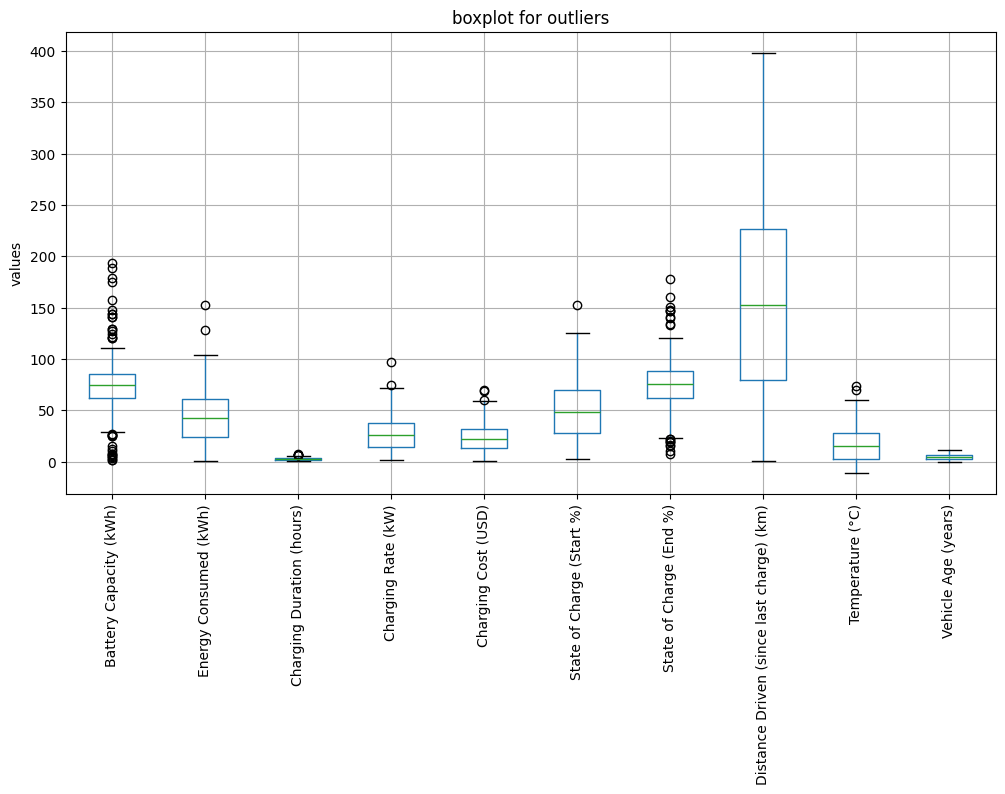

In [32]:
# plotting a boxplot for columns with outliers against user id

numeric_cols = df.select_dtypes(include='number') # selecting only numerical columns
plt.figure(figsize=(12,6))
df.boxplot()
plt.xticks(rotation=90)
plt.title("boxplot for outliers")
plt.ylabel("values")
plt.show()

# the graph below shows the following are the columns with outliers:
# - Battery Capacity (kWh)
# - Energy Consumed (kWh)
# - Charging duration (hours)
# - Charging Rate (kW)
# - Charging Cost (USD)
# - State of Charge (Start %)
# - State of Charge (End %)
# - Temperature (°C)

In [37]:
# Loop through rows by index
for index in range(len(df)):
    start_per = df.loc[index, 'State of Charge (Start %)']
    end_per = df.loc[index, 'State of Charge (End %)']
    
    if start_per > end_per:
        print("anomaly")
    else:
        print("normal")



normal
normal
normal
normal
normal
anomaly
normal
normal
normal
normal
normal
normal
normal
normal
anomaly
normal
normal
normal
anomaly
normal
normal
normal
normal
normal
anomaly
anomaly
anomaly
anomaly
normal
normal
normal
anomaly
normal
normal
normal
normal
anomaly
normal
anomaly
normal
anomaly
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
anomaly
normal
anomaly
normal
normal
anomaly
normal
anomaly
normal
normal
anomaly
normal
anomaly
normal
normal
normal
normal
normal
anomaly
anomaly
normal
normal
normal
normal
normal
anomaly
normal
normal
normal
normal
anomaly
normal
normal
normal
normal
normal
anomaly
anomaly
normal
normal
normal
anomaly
normal
normal
normal
normal
normal
anomaly
normal
normal
normal
anomaly
anomaly
anomaly
normal
anomaly
normal
normal
anomaly
anomaly
anomaly
normal
normal
anomaly
normal
normal
normal
normal
normal
normal
normal
anomaly
normal
normal
normal
anomaly
anomaly
normal
anomaly
normal
anomaly
normal
normal
normal
normal
anomaly
no